In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tools import parse_file, rescale, center, gen_borders, gen_grid
from interpol import idw_mesh

In [14]:
points = center(rescale(parse_file('../resources/demo4.mod1')))

In [15]:
points

array([[1.        , 1.        , 0.4       ],
       [0.66666667, 0.66666667, 1.        ],
       [0.66666667, 1.33333333, 1.        ],
       [1.33333333, 0.66666667, 1.        ],
       [1.33333333, 1.33333333, 1.        ]])

Centered and rescaled points are always within $[0, 2]$ boundary. Let's start by creating 4x4 grid in this bounds.

array([[0. , 0. , 0. ],
       [0. , 0.5, 0. ],
       [0. , 1. , 0. ],
       [0. , 1.5, 0. ],
       [0. , 2. , 0. ],
       [0.5, 0. , 0. ],
       [0.5, 0.5, 0. ],
       [0.5, 1. , 0. ],
       [0.5, 1.5, 0. ],
       [0.5, 2. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0.5, 0. ],
       [1. , 1. , 0. ],
       [1. , 1.5, 0. ],
       [1. , 2. , 0. ],
       [1.5, 0. , 0. ],
       [1.5, 0.5, 0. ],
       [1.5, 1. , 0. ],
       [1.5, 1.5, 0. ],
       [1.5, 2. , 0. ],
       [2. , 0. , 0. ],
       [2. , 0.5, 0. ],
       [2. , 1. , 0. ],
       [2. , 1.5, 0. ],
       [2. , 2. , 0. ]])

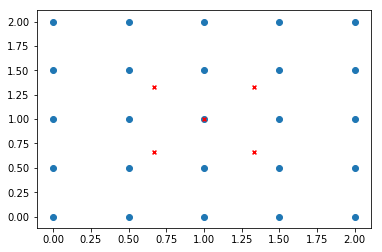

In [86]:
x_grid = np.linspace(0, 2, 5)
y_grid = np.linspace(0, 2, 5)
xy = np.array([[x, y] for x in x_grid for y in y_grid])
grid = np.hstack((xy, np.zeros(xy.shape[0])[:, None]))
plt.scatter(grid[:, 0], grid[:, 1]);
plt.scatter(points[:, 0], points[:, 1], c='red', s=15, marker='x')
grid

In [87]:
def random_grid(points, xmin=0, xmax=2, ymin=0, ymax=2):
    """ Generate 4x4 grid by randomly sampling from outside of points provided """
    n = len(points)
    n_gen = 16 - n
    gen_points = []
    
    i = 0
    for point in points:
        # project point onto the bounding box
        x, y, _ = point
        gen_points.append([xmin, y])
        i += 1 
        if i == n_gen:
            break
        gen_points.append([xmax, y])
        i += 1 
        if i == n_gen:
            break
        gen_points.append([x, ymin])
        i += 1 
        if i == n_gen:
            break
        gen_points.append([x, ymax])
        i += 1 
        if i == n_gen:
            break
    gen_points = np.hstack((np.array(gen_points), np.zeros(len(gen_points))[:, None]))
    return np.vstack([points, gen_points])


(-1, 3)

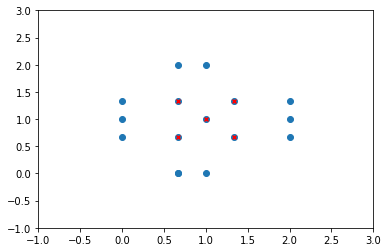

In [89]:
grid = random_grid(points)
plt.scatter(grid[:, 0], grid[:, 1]);
plt.scatter(points[:, 0], points[:, 1], c='red', s=15, marker='x')
plt.xlim(-1, 3)
plt.ylim(-1, 3)